In [22]:
# Цели этого документа:
# Возможность перечислить готовые отдельные наборы изображений
# Объединить эти изображения в супер датасет
# Возможность перемешать этот датасет
# Возможность разбить супер датасет на кучу мулепусеньких датасетиков которые могут поместиться в мои 16 гб оперативной памяти
# Эта штука валидна только для генерации датасетов из картинок, векторы и вращения мне не нужны

In [212]:
import numpy as np
import math
import pandas
from matplotlib import pyplot as plt
from PIL import Image
import os

In [213]:
save_path = "\CombinedDatasets"; save_name = "\Part"; 

In [214]:
shared_folder = "BigDataPeople"
dataset_list = ["\Knight", "\SuitMan", "\Woman1"]
photos_string = 'Photos.npy'; labels_string = 'Labels.npy'
#vectors_string = 'Vectors.npy'; rotations_string = 'RotationDegrees.npy'
albedos_string = 'Albedos.npy'; normals_string = 'Normals.npy'
masks_string = 'Masks.npy'
fragment_length = 5700
small_fragment_length = 100
number_of_splits = 5

In [215]:
def get_extras_id(index):
    return index // (fragment_length // small_fragment_length)

In [216]:
def get_start_and_end_points(number_of_cuts, total_length):
    break_points = []
    start_point = 0
    fraction = total_length / number_of_cuts
    for i in range(1, number_of_cuts + 1):
        rounded = round(fraction * i) 
        break_points.append((start_point, rounded))
        start_point = rounded
    return break_points

In [217]:
print(shared_folder + dataset_list[0] + photos_string)

BigDataPeople\KnightPhotos.npy


In [218]:
# ONLY START ONCE FOR ALL GENERATIONS
indices_list = {}
for i in range(len(dataset_list)):
    name = dataset_list[i]
    indices = np.arange(fragment_length)
    np.random.shuffle(indices)
    indices_list[name] = (indices)
print(indices_list)

{'\\Knight': array([3987, 3758, 4226, ..., 4886, 2731,  440]), '\\SuitMan': array([2821, 4923, 2171, ..., 3063, 1504, 3818]), '\\Woman1': array([ 431, 4351, 4218, ...,  606, 5312,  841])}


In [219]:
# ONLY START ONCE FOR ALL GENERATIONS
internal_indicies = []
for i in range(number_of_splits):
    start_index, end_index = get_start_and_end_points(number_of_splits, fragment_length)[i]
    length = end_index - start_index
    inner_indicies_length = length * len(dataset_list)
    inner_indicies = np.arange(inner_indicies_length)
    np.random.shuffle(inner_indicies)
    internal_indicies.append(inner_indicies)
print(internal_indicies)

[array([2190, 1444, 3113, ..., 2328, 1607, 2717]), array([2623, 3244, 1033, ..., 2378,  645,  803]), array([ 244, 1268, 3322, ..., 2730, 2580,  965]), array([1020,  871, 1470, ...,  826, 3411, 1815]), array([2876, 1635,   27, ..., 1936, 1693, 2235])]


In [220]:
def the_super_function(name_string, short_list = False):
    for i in range(number_of_splits):
        start_index, end_index = get_start_and_end_points(number_of_splits, fragment_length)[i]
        print("__NEW__ITERATION__", start_index, end_index)
        length = end_index - start_index
        final_dataset = np.zeros((length * len(dataset_list), 64,64, 3))
        for name_index in range(len(dataset_list)):
            name = dataset_list[name_index]
            print(name)
            local_indices = indices_list[name][start_index : end_index]
            current_dataset = np.load(shared_folder + name + name + name_string)
            if short_list:
                for x in range(len(local_indices)):
                    final_dataset[name_index * length + x] = current_dataset[get_extras_id(local_indices[x])]
            else:
                final_dataset[name_index * length : (name_index + 1) * length] = current_dataset[local_indices]
        final_dataset = final_dataset.astype("float16")
        final_dataset = final_dataset[internal_indicies[i]]
        print("saved")
        np.save(shared_folder + save_path + save_name + str(i) + name_string, final_dataset)
        

In [221]:
the_super_function(normals_string, short_list=True)

__NEW__ITERATION__ 0 1140
\Knight
\SuitMan
\Woman1
saved
__NEW__ITERATION__ 1140 2280
\Knight
\SuitMan
\Woman1
saved
__NEW__ITERATION__ 2280 3420
\Knight
\SuitMan
\Woman1
saved
__NEW__ITERATION__ 3420 4560
\Knight
\SuitMan
\Woman1
saved
__NEW__ITERATION__ 4560 5700
\Knight
\SuitMan
\Woman1
saved


In [223]:
the_super_function(masks_string, short_list=True)

__NEW__ITERATION__ 0 1140
\Knight
\SuitMan
\Woman1
saved
__NEW__ITERATION__ 1140 2280
\Knight
\SuitMan
\Woman1
saved
__NEW__ITERATION__ 2280 3420
\Knight
\SuitMan
\Woman1
saved
__NEW__ITERATION__ 3420 4560
\Knight
\SuitMan
\Woman1
saved
__NEW__ITERATION__ 4560 5700
\Knight
\SuitMan
\Woman1
saved


In [224]:
the_super_function(albedos_string, short_list=True)

__NEW__ITERATION__ 0 1140
\Knight
\SuitMan
\Woman1
saved
__NEW__ITERATION__ 1140 2280
\Knight
\SuitMan
\Woman1
saved
__NEW__ITERATION__ 2280 3420
\Knight
\SuitMan
\Woman1
saved
__NEW__ITERATION__ 3420 4560
\Knight
\SuitMan
\Woman1
saved
__NEW__ITERATION__ 4560 5700
\Knight
\SuitMan
\Woman1
saved


In [222]:
the_super_function(photos_string, short_list=False)

__NEW__ITERATION__ 0 1140
\Knight
\SuitMan
\Woman1
saved
__NEW__ITERATION__ 1140 2280
\Knight
\SuitMan
\Woman1
saved
__NEW__ITERATION__ 2280 3420
\Knight
\SuitMan
\Woman1
saved
__NEW__ITERATION__ 3420 4560
\Knight
\SuitMan
\Woman1
saved
__NEW__ITERATION__ 4560 5700
\Knight
\SuitMan
\Woman1
saved


2773 48


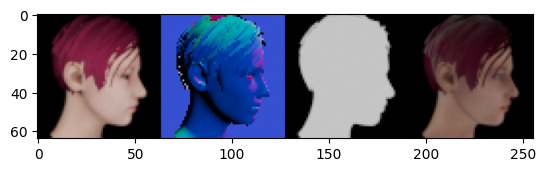

In [231]:
wanted_id = 2736;
print(indices_list["\\Knight"][wanted_id], get_extras_id(indices_list["\\Knight"][wanted_id]))
photos1 = np.load(shared_folder + save_path + save_name + str(0) + photos_string);
photo = photos1[wanted_id]; 
photos1 = np.load(shared_folder + save_path + save_name + str(0) + normals_string);
normal =  photos1[wanted_id]; 
photos1 = np.load(shared_folder + save_path + save_name + str(0) + masks_string);
mask =  photos1[wanted_id]; 
photos1 = np.load(shared_folder + save_path + save_name + str(0) + albedos_string);
albedo =  photos1[wanted_id]; 
combined = np.concatenate([photo, normal, mask, albedo], axis = 1).astype("float32")
plt.imshow(combined); del photos1